In [1]:
import pandas as pd
import creds
import seaborn as sns
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
from scipy import stats
from numpy import mean
from numpy import absolute

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_regression, SelectPercentile, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score



from pandas.plotting import scatter_matrix 
from sklearn.feature_selection import mutual_info_regression

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv(r'/Users/samgarvis/Documents/GitHub/cs-4641-tiktok-trends/data/all_tiktoks_cleaned.csv')


In [3]:
data.describe()

,id,text,hour,dayofweek,authorMeta.id,authorMeta.verified,authorMeta.following,authorMeta.fans,authorMeta.heart,authorMeta.video,authorMeta.digg,musicMeta.musicId,musicMeta.musicOriginal,musicMeta.duration,videoMeta.duration,diggCount,shareCount,playCount,commentCount,numHashtags,popular,fyp,foryou,foryoupage,viral,fypシ,funny,xyzbca,comedy,duet,tiktok,fy,parati
count,3.133700e+04,31337.000000,31337.000000,31337.000000,3.133700e+04,31337.000000,31337.000000,3.133700e+04,3.133700e+04,31337.000000,3.133700e+04,3.133700e+04,31337.000000,31337.000000,31337.000000,3.133700e+04,3.133700e+04,3.133700e+04,3.133700e+04,31337.000000,31337.000000,31337.000000,31337.000000,31337.000000,31337.000000,31337.000000,31337.000000,31337.000000,31337.000000,31337.000000,31337.000000,31337.000000,31337.000000
mean,6.922949e+18,62.790471,12.525385,2.959632,5.931298e+18,0.130644,607.533586,1.722522e+06,4.639007e+07,405.399241,1.615993e+04,6.722374e+18,0.734691,30.935093,21.765006,2.850218e+05,8.583494e+03,2.023810e+06,3.941697e+03,3.446724,0.397071,0.362862,0.151546,0.109360,0.068896,0.034304,0.030954,0.030443,0.022306,0.020551,0.018700,0.018668,0.018317
std,1.644000e+17,43.540728,7.695184,1.946813,2.209927e+18,0.337016,1489.630103,5.029326e+06,1.542004e+08,707.928300,6.054669e+04,9.741395e+17,0.441505,25.701703,16.464215,8.497182e+05,3.307466e+04,6.047846e+06,1.804526e+04,3.422495,0.489299,0.480833,0.358586,0.312095,0.253282,0.182013,0.173195,0.171806,0.147679,0.141877,0.135465,0.135352,0.134097
min,1.140000e+17,0.000000,0.000000,0.000000,6.232600e+04,0.000000,0.000000,4.000000e+01,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.930000e+18,27.000000,4.000000,1.000000,6.640000e+18,0.000000,34.000000,6.220000e+04,6.570000e+05,59.000000,1.066000e+03,6.820000e+18,0.000000,13.000000,10.000000,1.586000e+03,1.300000e+01,1.430000e+04,2.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.940000e+18,57.000000,15.000000,3.000000,6.760000e+18,0.000000,138.000000,1.445000e+05,2.300000e+06,166.000000,4.542000e+03,6.910000e+18,1.000000,24.000000,15.000000,2.280000e+04,2.190000e+02,2.285000e+05,2.440000e+02,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.940000e+18,95.000000,19.000000,5.000000,6.820000e+18,0.000000,437.000000,7.374000e+05,1.310000e+07,461.000000,1.670000e+04,6.940000e+18,1.000000,48.000000,28.000000,2.033000e+05,3.602000e+03,1.600000e+06,2.098000e+03,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.950000e+18,150.000000,23.000000,6.000000,6.950000e+18,1.000000,10000.000000,7.910000e+07,1.900000e+09,24100.000000,2.200000e+06,6.950000e+18,1.000000,542.000000,180.000000,2.670000e+07,1.300000e+06,1.829000e+08,1.200000e+06,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data_corr = data.corr()
feature_corr = pd.DataFrame(data_corr[data_corr['popular'] > .1]['popular'].drop('popular').sort_values(ascending=False)).reset_index()
high_corr_features = feature_corr['index'].to_list()
feature_corr



,index,popular
0,diggCount,0.395625
1,playCount,0.391973
2,shareCount,0.305363
3,authorMeta.fans,0.305189
4,authorMeta.verified,0.281845
5,authorMeta.heart,0.281114
6,commentCount,0.248774
7,videoMeta.duration,0.144815
8,text,0.128226
9,authorMeta.video,0.107522


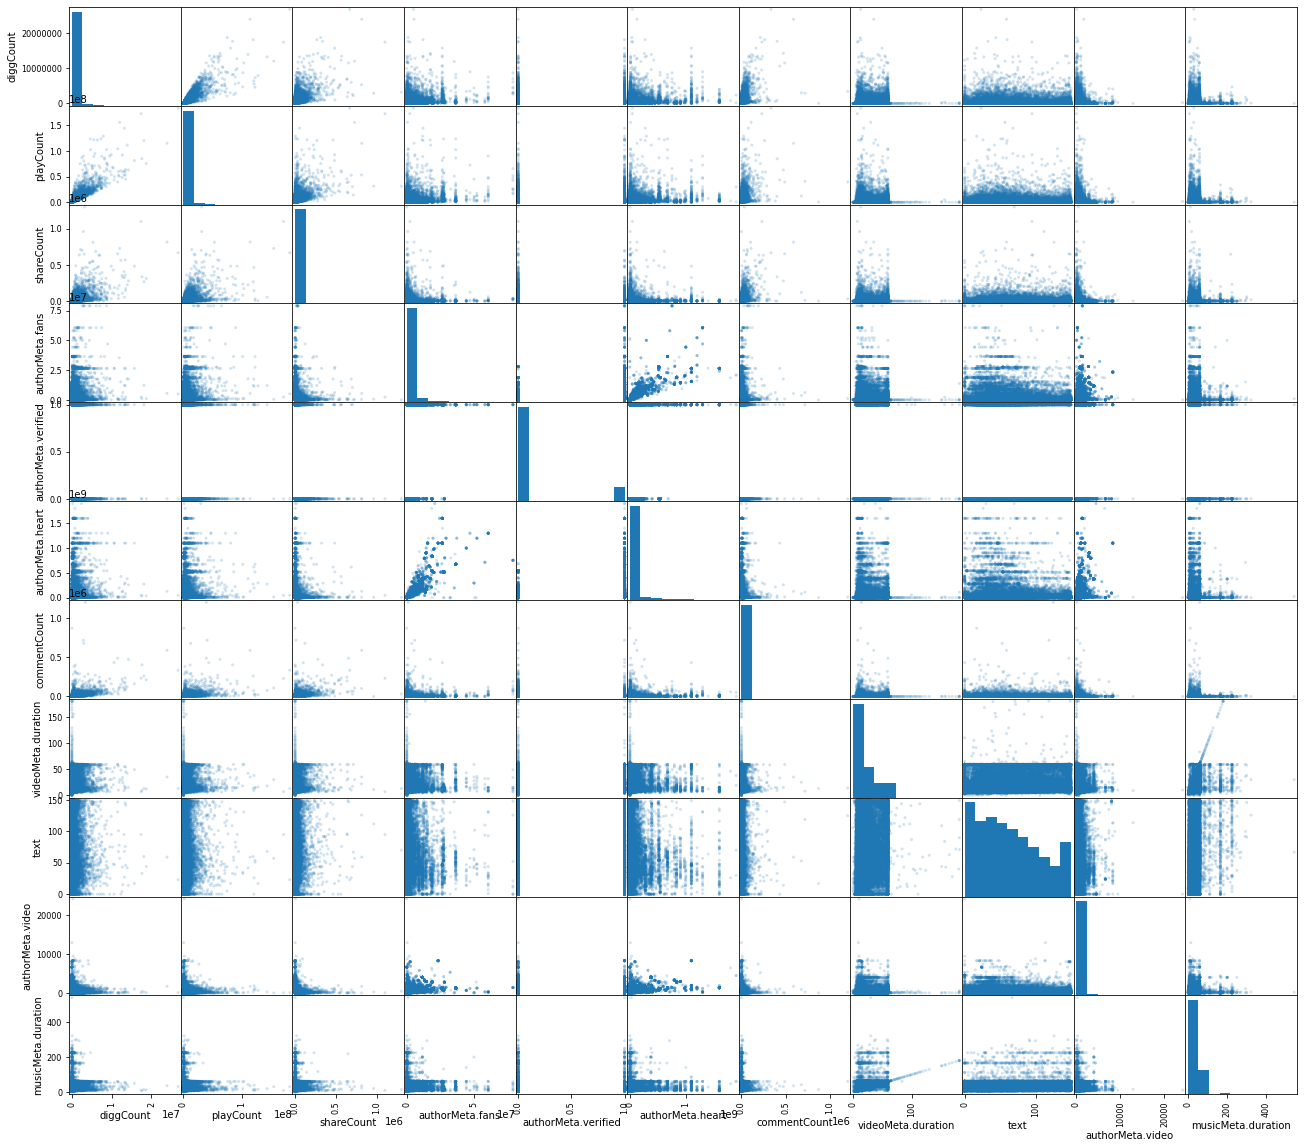

In [5]:
pd.plotting.scatter_matrix(data[high_corr_features], alpha=0.2,figsize=(22, 20));


Best alpha using built-in LassoCV: 0.013656
Best score using built-in LassoCV: 0.250429 

Lasso picked 17 variables and eliminated the other 15 variables



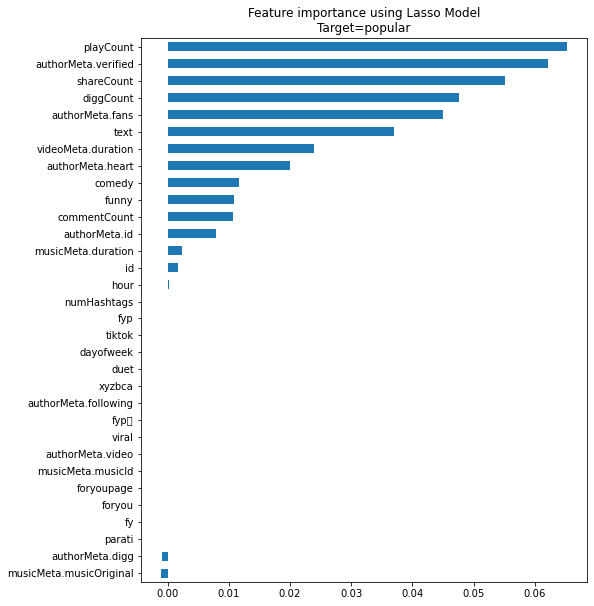

Best alpha using built-in LassoCV: 5303.899440
Best score using built-in LassoCV: 0.782037 

Lasso picked 29 variables and eliminated the other 3 variables



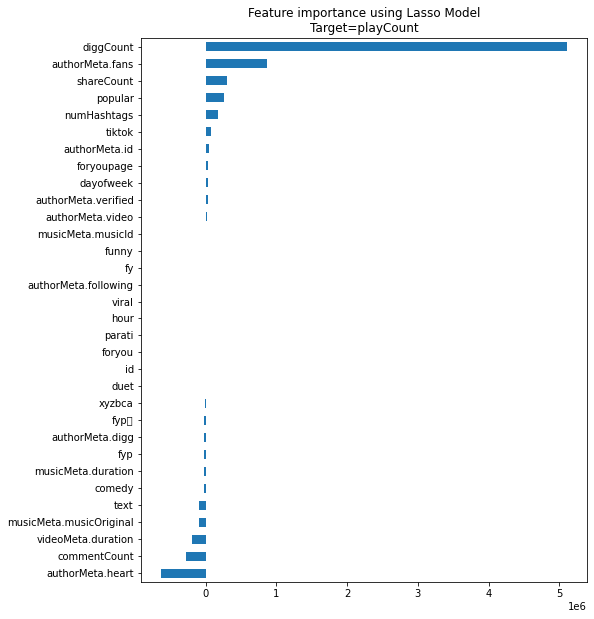

Best alpha using built-in LassoCV: 15.406838
Best score using built-in LassoCV: 0.069621 

Lasso picked 18 variables and eliminated the other 14 variables



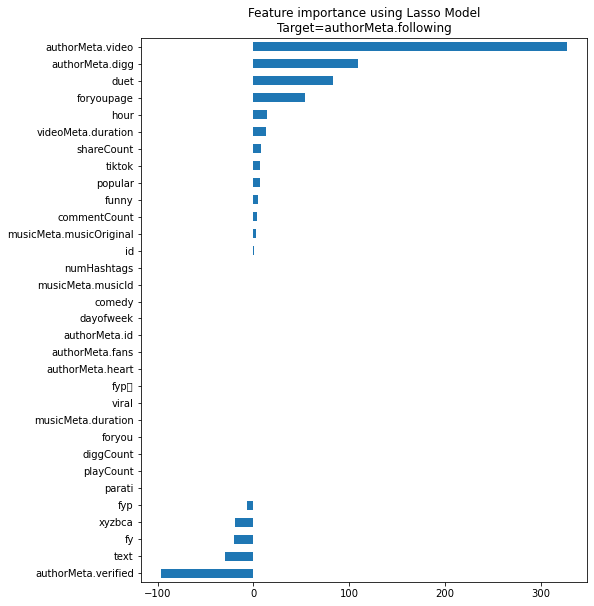

In [6]:
df = data
scaler = StandardScaler()

mylist = ['popular','playCount','authorMeta.following']
for feat in mylist:
    y = df[feat]
    df1 = df.drop(columns=[feat])
    X = pd.DataFrame(scaler.fit_transform(df1), index=df1.index, columns=df1.columns)

    reg = LassoCV()
    reg.fit(X, y)
    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(X,y),"\n")
    coef = pd.Series(reg.coef_, index = X.columns)

    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables\n")

    imp_coef = coef.sort_values()
    import matplotlib
    matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title(f"Feature importance using Lasso Model\nTarget={feat}")
    plt.show()


In [7]:
scaler = StandardScaler()
X = data.drop(columns=['popular'])
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
y = data[['popular']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)

df = pd.DataFrame(data={'rfe_num': [], 'score_rfe': []})
rfe_list = [1,3,5,7,9,11,13,15,17,19,25,30]
for rfe_num in rfe_list:
    rfe = RFE(DecisionTreeClassifier(), rfe_num)
    fit = rfe.fit(X, y)        
    good_columns = pd.DataFrame(X.columns)
    good_columns = good_columns.loc[fit.support_,:]
    best_columns = good_columns[0].to_list()
    
    grid_params_dtc = [{'min_samples_split': [1,2,3]}]
    grid_DTC = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_params_dtc, cv = 3,scoring='accuracy')
    grid_DTC.fit(X_train[best_columns], y_train)
    ypred = grid_DTC.predict(X_test[best_columns])
    scores = grid_DTC.score(X_test[best_columns],y_test)
    df1 = pd.DataFrame(data={'rfe_num': [rfe_num], 'score_rfe': [scores]})
    df = df.append(df1)
df2 = df.reset_index().drop(columns=['index'])

df = pd.DataFrame(data={'k_num': [], 'score_k': []})
k_list = [1,3,5,7,9,11,13,15,17,19,25,30]
for k_num in k_list:
    selector = SelectKBest(f_classif, k=k_num)
    selector.fit(X, y)
    cols = selector.get_support(indices=True)
    
    grid_params_dtc = [{'min_samples_split': [1,2,3]}]
    grid_DTC = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_params_dtc, cv = 3,scoring='accuracy')
    grid_DTC.fit(X_train.iloc[:,cols], y_train)
    ypred = grid_DTC.predict(X_test.iloc[:,cols])
    scores = grid_DTC.score(X_test.iloc[:,cols],y_test)
    df1 = pd.DataFrame(data={'k_num': [k_num], 'score_k': [scores]})
    df = df.append(df1)
df = df.reset_index().drop(columns=['index'])
pd.merge(df2, df, left_index=True, right_index=True)

,rfe_num,score_rfe,k_num,score_k
0,1.0,1.0,1.0,0.927675
1,3.0,1.0,3.0,1.000000
2,5.0,1.0,5.0,1.000000
3,7.0,1.0,7.0,1.000000
4,9.0,1.0,9.0,1.000000
5,11.0,1.0,11.0,1.000000
6,13.0,1.0,13.0,1.000000
7,15.0,1.0,15.0,1.000000
8,17.0,1.0,17.0,1.000000
9,19.0,1.0,19.0,1.000000


In [8]:
scaler = StandardScaler()
X = data.drop(columns=['playCount'])
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
y = data[['playCount']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

df = pd.DataFrame(data={'rfe_num': [], 'score_rfe': []})
rfe_list = [1,3,5,7,9,11,13,15,17,19,25,30]
for rfe_num in rfe_list:
    rfe = RFE(ElasticNet(), rfe_num)
    fit = rfe.fit(X, y)
    good_columns = pd.DataFrame(X.columns)
    good_columns = good_columns.loc[fit.support_,:]
    best_columns = good_columns[0].to_list()
    
    grid_params_en = [{'alpha': [.1,.5,1]}]
#     grid_EN = GridSearchCV(estimator=ElasticNet(), param_grid=grid_params_en, cv = 3,scoring='neg_mean_squared_error')
    grid_EN = GridSearchCV(estimator=ElasticNet(), param_grid=grid_params_en, cv = 3,scoring='r2')
    grid_EN.fit(X_train[best_columns], y_train)
    ypred = grid_EN.predict(X_test[best_columns])
    scores = grid_EN.score(X_test[best_columns],y_test)
    df1 = pd.DataFrame(data={'rfe_num': [rfe_num], 'score_rfe': [scores]})
    df = df.append(df1)
df2 = df.reset_index().drop(columns=['index'])


df = pd.DataFrame(data={'k_num': [], 'score_k': []})
k_list = [1,3,5,7,9,11,13,15,17,19,25,30]
for k_num in k_list:
    selector = SelectKBest(f_regression, k=k_num)
    selector.fit(X, y)
    cols = selector.get_support(indices=True)
    
    grid_params_en = [{'alpha': [.1,.5,1]}]
#     grid_EN = GridSearchCV(estimator=ElasticNet(), param_grid=grid_params_en, cv = 3,scoring='neg_mean_squared_error')
    grid_EN = GridSearchCV(estimator=ElasticNet(), param_grid=grid_params_en, cv = 3,scoring='r2')
    grid_EN.fit(X_train.iloc[:,cols], y_train)
    ypred = grid_EN.predict(X_test.iloc[:,cols])
    scores = grid_EN.score(X_test.iloc[:,cols],y_test)
    df1 = pd.DataFrame(data={'k_num': [k_num], 'score_k': [scores]})
    df = df.append(df1)
df = df.reset_index().drop(columns=['index'])
df = pd.merge(df2, df, left_index=True, right_index=True)

# scaler = StandardScaler()
# X = data.drop(columns=['playCount'])
# X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
# y = data[['playCount']].values.ravel()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# y_train = pd.DataFrame(y_train).rename(columns={0: "playCount"})
# X_train['playCount'] = y_train
# mean = X_train['playCount'].mean()
# std = X_train['playCount'].std()
# X_train = X_train[X_train['playCount'] < (mean + (3*std))]
# y_train = X_train[['playCount']]
# X_train = X_train.drop(columns=['playCount'])
# df5 = pd.DataFrame(data={'rfe_num_no_out': [], 'score_rfe_no_out': []})
# rfe_list = [1,3,5,7,9,11,13,15,17,19,25,30]
# for rfe_num in rfe_list:
#     rfe = RFE(ElasticNet(), rfe_num)
#     fit = rfe.fit(X, y)

#     good_columns = pd.DataFrame(X.columns)
#     good_columns = good_columns.loc[fit.support_,:]
#     best_columns = good_columns[0].to_list()
    
#     grid_params_en = [{'alpha': [.1,.5,1]}]
#     grid_EN = GridSearchCV(estimator=ElasticNet(), param_grid=grid_params_en, cv = 3,scoring='neg_mean_squared_error')
#     grid_EN.fit(X_train[best_columns], y_train)
#     ypred = grid_EN.predict(X_test[best_columns])
#     scores = grid_EN.score(X_test[best_columns],y_test)
#     df1 = pd.DataFrame(data={'rfe_num_no_out': [rfe_num], 'score_rfe_no_out': [scores]})
#     df5 = df5.append(df1)
# df5 = df5.reset_index().drop(columns=['index'])
# df = pd.merge(df, df5, left_index=True, right_index=True)

df


,rfe_num,score_rfe,k_num,score_k
0,1.0,0.826411,1.0,0.826411
1,3.0,0.835621,3.0,0.830280
2,5.0,0.836068,5.0,0.836068
3,7.0,0.836296,7.0,0.838608
4,9.0,0.838835,9.0,0.839448
5,11.0,0.838903,11.0,0.839492
6,13.0,0.839997,13.0,0.839408
7,15.0,0.839989,15.0,0.839441
8,17.0,0.840038,17.0,0.839465
9,19.0,0.840057,19.0,0.839279


<AxesSubplot:xlabel='num_features', ylabel='r2'>

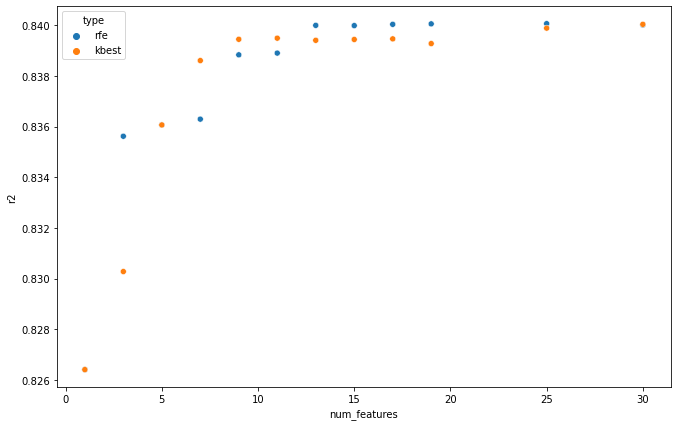

In [9]:
df3 = df[['rfe_num','score_rfe']]
df3['type'] = 'rfe'
df3 = df3.rename(columns={"rfe_num": "num_features", "score_rfe": "r2"})
df4 = df[['k_num','score_k']]
df4 = df4.rename(columns={"k_num": "num_features", "score_k": "r2"})
df4['type'] = 'kbest'
df3 = df3.append(df4)
# df5 = df[['rfe_num_no_out','score_rfe_no_out']]
# df5 = df5.rename(columns={"rfe_num_no_out": "num_features", "score_rfe_no_out": "r2"})
# df5['type'] = 'rfe'
# df5['remove_outlier'] = 'yes'
# df3['remove_outlier'] = 'no'
# df3 = df3.append(df5)


plt.figure(figsize=(11, 7))
sns.scatterplot(data=df3, x=df3['num_features'], y=df3['r2'], hue=df3['type']
                ,estimator=None, palette=sns.color_palette('tab10', n_colors=2))

In [21]:
dummy = data.copy()
length = int(dummy.shape[0] / 2)
dummy.iloc[:length,:]
dummy.iloc[length:,:]


,id,text,hour,dayofweek,authorMeta.id,authorMeta.verified,authorMeta.following,authorMeta.fans,authorMeta.heart,authorMeta.video,authorMeta.digg,musicMeta.musicId,musicMeta.musicOriginal,musicMeta.duration,videoMeta.duration,diggCount,shareCount,playCount,commentCount,numHashtags,popular,fyp,foryou,foryoupage,viral,fypシ,funny,xyzbca,comedy,duet,tiktok,fy,parati
15668,6.940000e+18,43,16,2,6.670000e+18,1,33,9200000,276000000,1715,62400,6.940000e+18,1,15,15,4200000,6364,20100000,18800,1,1,0,0,0,0,0,0,0,0,0,0,0,0
15669,6.940000e+18,111,22,4,6.770000e+18,0,240,1800000,34300000,539,5248,6.790000e+18,0,30,24,199800,496,1400000,1280,7,1,1,0,0,0,0,0,0,0,0,0,0,0
15670,6.940000e+18,71,14,2,6.920000e+18,0,12,2631,137600,40,678,6.940000e+18,1,14,15,59100,6190,1000000,815,5,1,1,1,1,0,0,1,0,0,0,0,1,0
15671,6.940000e+18,110,20,3,6.810000e+18,0,109,974400,9900000,106,6302,6.800000e+18,0,60,15,84100,210,479800,1222,8,0,1,0,0,0,0,0,0,0,0,0,0,0
15672,6.940000e+18,30,4,1,6.590000e+18,0,97,825900,21500000,165,2462,6.910000e+18,1,15,14,118300,690,648000,1310,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31332,6.820000e+18,21,20,4,6.740000e+18,0,25,45700,2000000,43,372,6.820000e+18,1,5,5,205,12,2365,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0
31333,6.820000e+18,37,0,4,6.740000e+18,0,25,45700,2000000,43,372,6.790000e+18,1,8,8,52,1,860,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0
31334,6.820000e+18,33,23,3,6.740000e+18,0,25,45700,2000000,43,372,6.800000e+18,1,12,6,210,4,1997,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
31335,6.810000e+18,60,18,6,6.740000e+18,0,25,45700,2000000,43,372,6.810000e+18,1,12,12,73,0,1411,7,2,0,1,0,0,0,0,0,0,0,0,0,0,0


LR
1 rfe
MSE:  -27256475018871.023
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2042136.7873249827


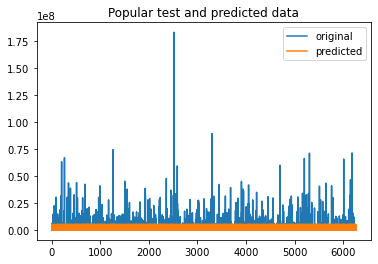




LR
5 rfe
MSE:  -27186647567656.32
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2036805.0159415288


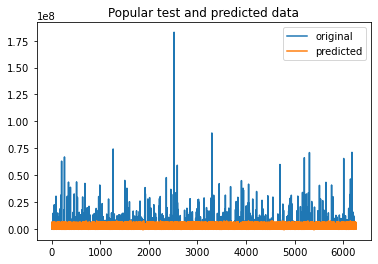




LR
9 rfe
MSE:  -27205851993199.797
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2035288.017592216


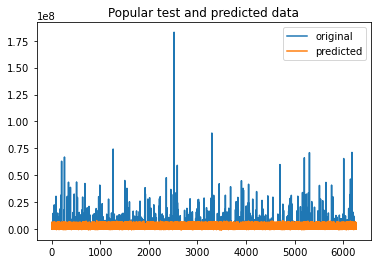




LR
13 rfe
MSE:  -27204220652321.875
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2037023.8837976845


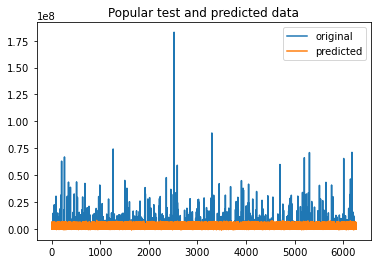




LR
17 rfe
MSE:  -27209866482235.54
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2036737.202299457


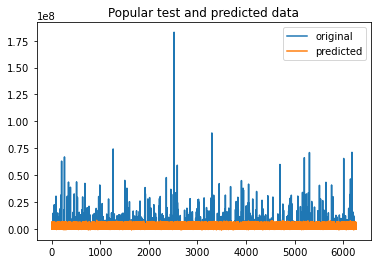




LR
19 rfe
MSE:  -27183619275069.816
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2037249.1508622027


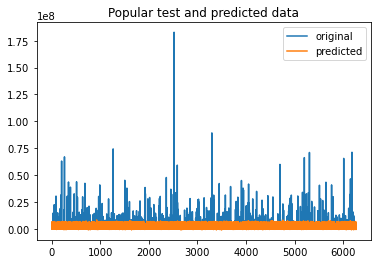




LR
22 rfe
MSE:  -22027052453617.176
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2013658.780831379


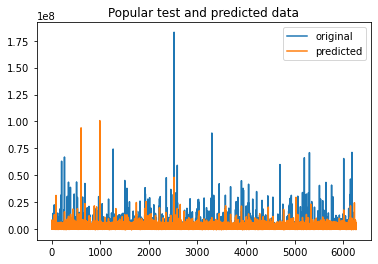




LR
25 rfe
MSE:  -5791121153981.444
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1981648.611714131


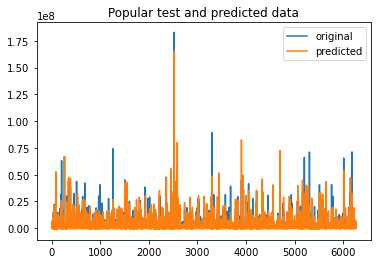




LR
27 rfe
MSE:  -5790568890743.87
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980533.244426435


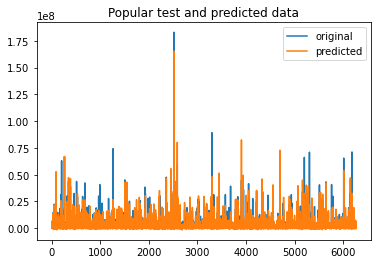




LR
30 rfe
MSE:  -5615174929527.444
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980856.153459875


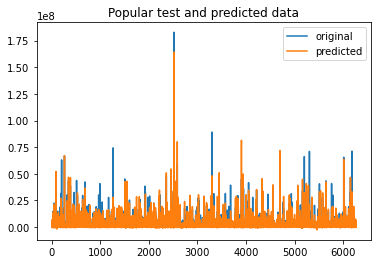




LR
1 skb
MSE:  -5928351456823.14
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1984561.6220647944


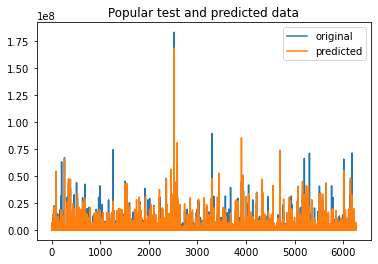




LR
5 skb
MSE:  -5767975193661.842
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1979309.1247911332


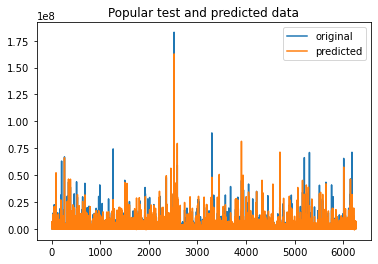




LR
9 skb
MSE:  -5629794353199.284
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982804.236925181


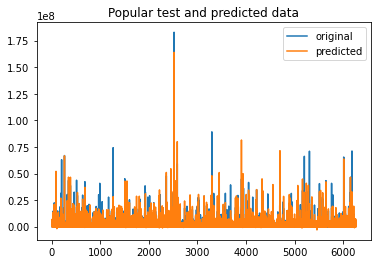




LR
13 skb
MSE:  -5626642351324.41
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1983861.6591472223


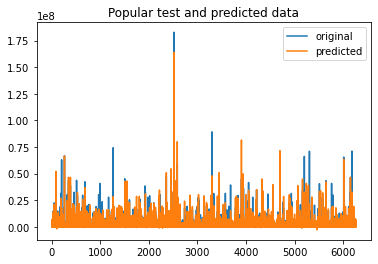




LR
17 skb
MSE:  -5625984753394.7705
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982336.5183591892


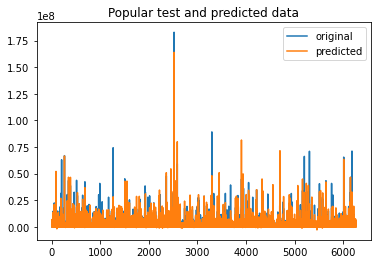




LR
19 skb
MSE:  -5630153941581.863
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982373.3781844808


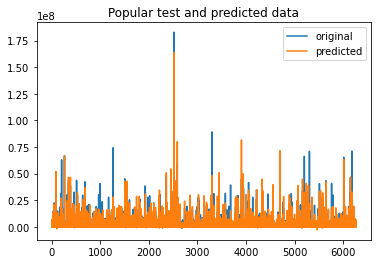




LR
22 skb
MSE:  -5624392113173.758
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982029.6738847576


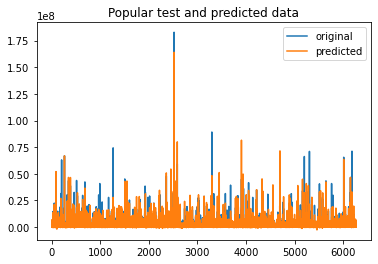




LR
25 skb
MSE:  -5615948214952.413
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1981111.7887786983


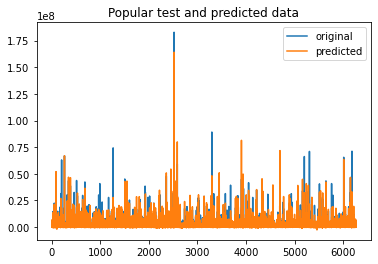




LR
27 skb
MSE:  -5613171414069.308
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980488.7985675796


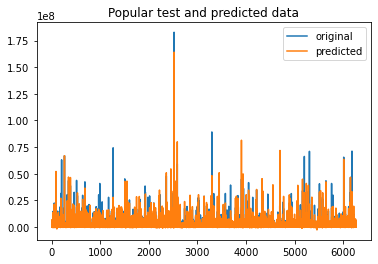




LR
30 skb
MSE:  -5613345809756.74
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980966.3519701157


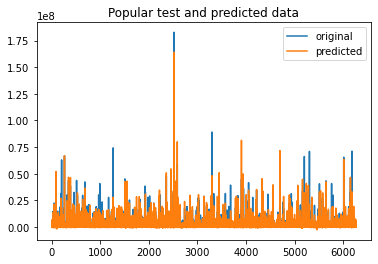




LASSO
1 rfe
MSE:  -27256474769627.805
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2042136.7880742098


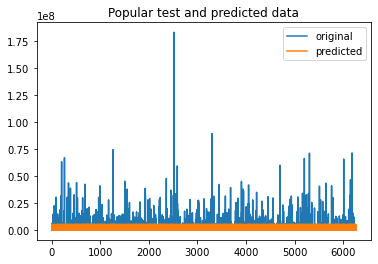




LASSO
5 rfe
MSE:  -27186646558383.867
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2036804.9989936561


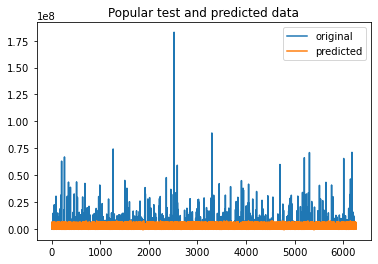




LASSO
9 rfe
MSE:  -27205850470094.78
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2035288.0041499226


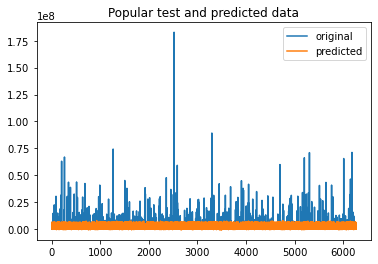




LASSO
13 rfe
MSE:  -27204218707701.027
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2037023.8495164334


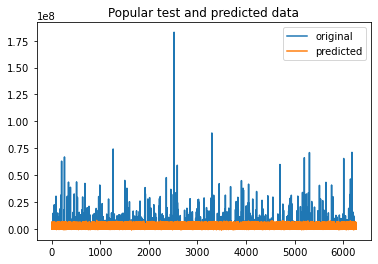




LASSO
17 rfe
MSE:  -27209864080269.316
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2036737.1603965077


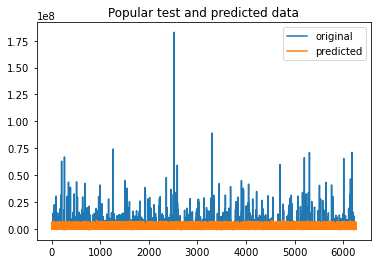




LASSO
19 rfe
MSE:  -27183617433262.355
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2037249.1078223458


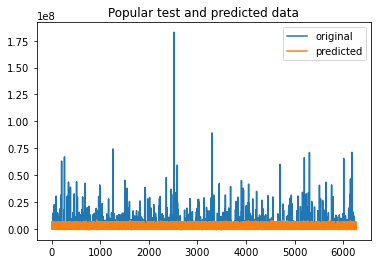




LASSO
22 rfe
MSE:  -22027050939006.176
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2013658.7345789254


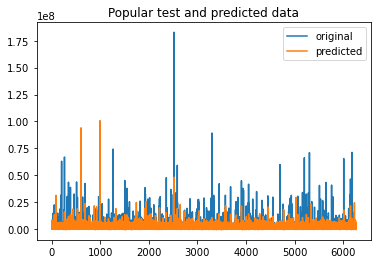




LASSO
25 rfe
MSE:  -5791118656027.734
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1981648.629642503


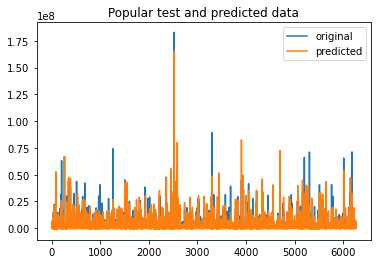




LASSO
27 rfe
MSE:  -5790566350376.411
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980533.296530481


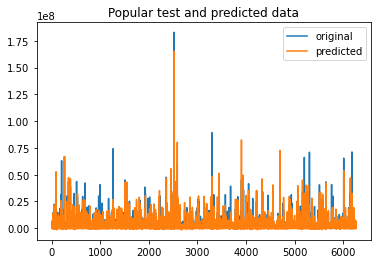




LASSO
30 rfe
MSE:  -5617274627029.756
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1981279.0642246052


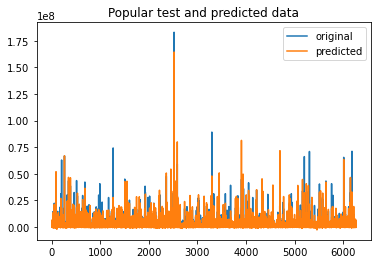




LASSO
1 skb
MSE:  -5928351015867.605
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1984561.6331769936


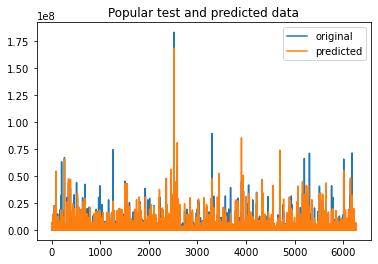




LASSO
5 skb
MSE:  -5767973805976.582
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1979309.1487186784


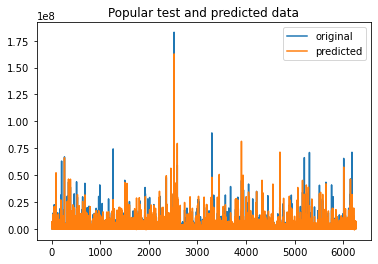




LASSO
9 skb
MSE:  -5629792765631.441
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982804.2164504146


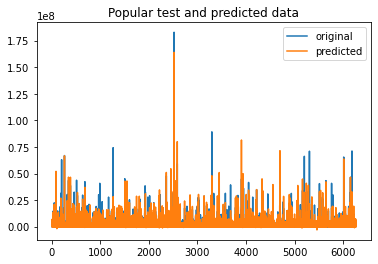




LASSO
13 skb
MSE:  -5626640738699.792
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1983861.6278908662


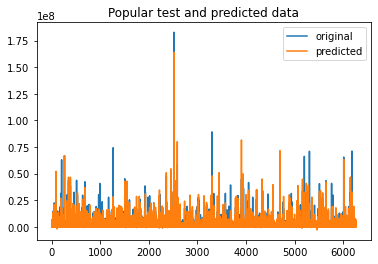




LASSO
17 skb
MSE:  -5625983077066.008
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982336.5078937851


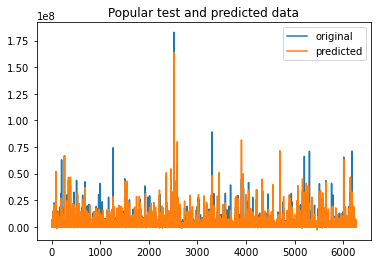




LASSO
19 skb
MSE:  -5630152071507.379
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982373.3738386484


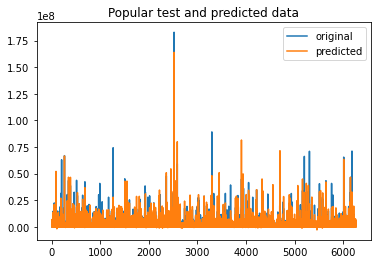




LASSO
22 skb
MSE:  -5624390181421.093
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982029.6269508419


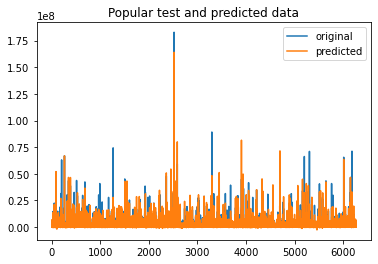




LASSO
25 skb
MSE:  -5615946267779.673
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1981111.7995145654


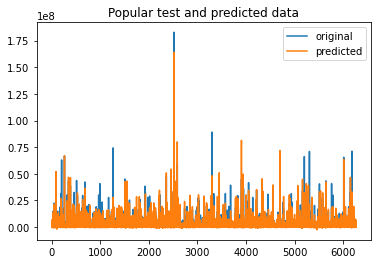




LASSO
27 skb
MSE:  -5613169473847.822
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980488.8296033738


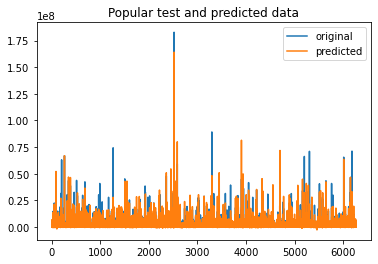




LASSO
30 skb
MSE:  -5613343796925.15
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980966.381487155


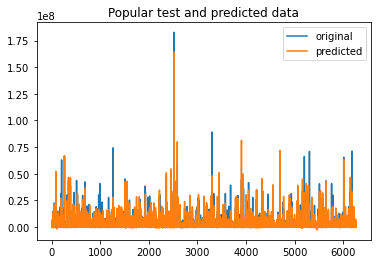




RIDGE
1 rfe
MSE:  -27256451211528.086
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2042136.8589171846


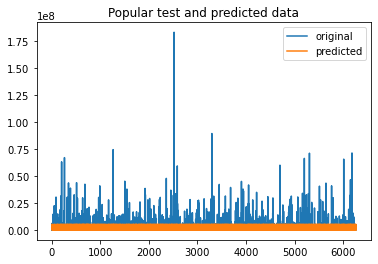




RIDGE
5 rfe
MSE:  -27186624923700.387
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2036805.0196180823


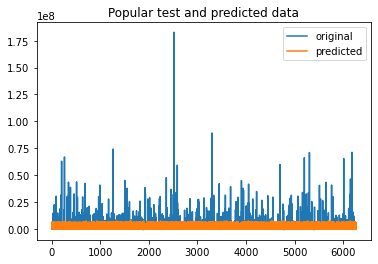




RIDGE
9 rfe
MSE:  -27205827268330.54
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2035288.059987631


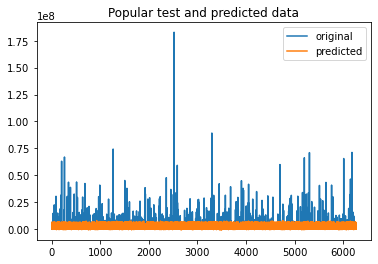




RIDGE
13 rfe
MSE:  -27204194694677.094
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2037023.7855888817


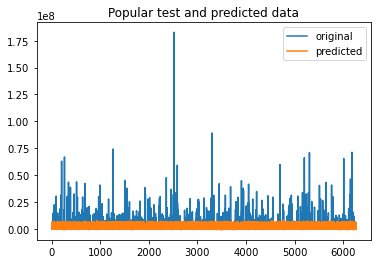




RIDGE
17 rfe
MSE:  -27209840207522.676
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2036737.1821737674


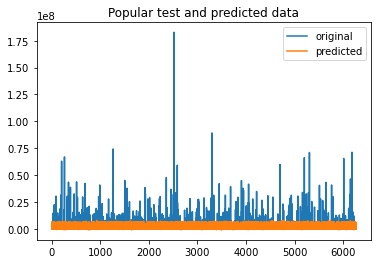




RIDGE
19 rfe
MSE:  -27183594814214.547
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2037249.0363310892


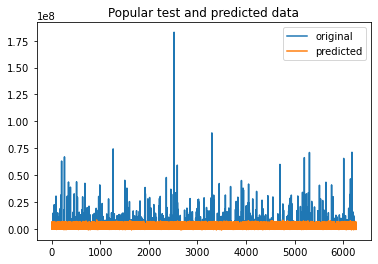




RIDGE
22 rfe
MSE:  -22027034594397.86
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2013659.7156928128


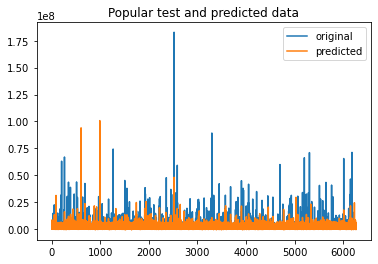




RIDGE
25 rfe
MSE:  -5790889183448.46
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1981647.5255028848


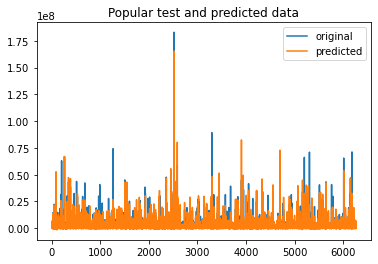




RIDGE
27 rfe
MSE:  -5790336948408.194
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980532.1105701225


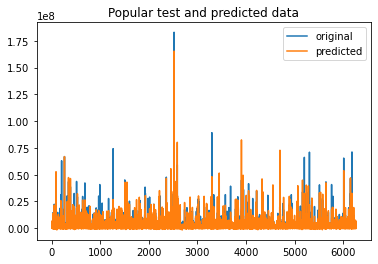




RIDGE
30 rfe
MSE:  -5617054750265.109
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1981277.0454108184


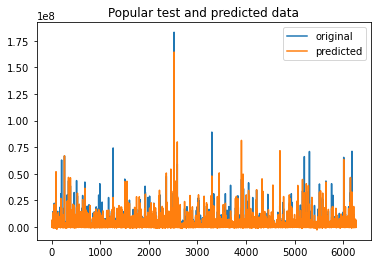




RIDGE
1 skb
MSE:  -5928257528546.698
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1984563.9902331925


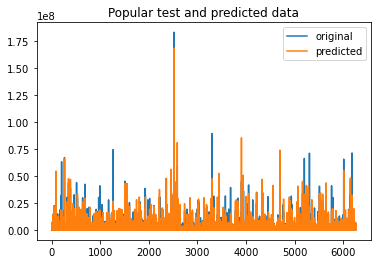




RIDGE
5 skb
MSE:  -5767767109464.375
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1979307.7115206642


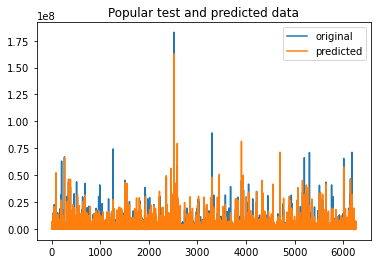




RIDGE
9 skb
MSE:  -5629575000338.668
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982801.8159018087


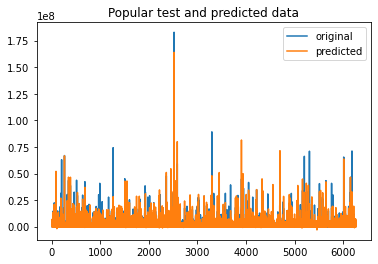




RIDGE
13 skb
MSE:  -5626422932142.367
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1983859.352545367


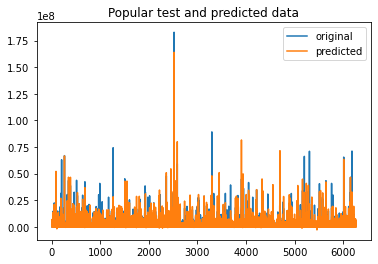




RIDGE
17 skb
MSE:  -5625765645929.842
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982334.2178417214


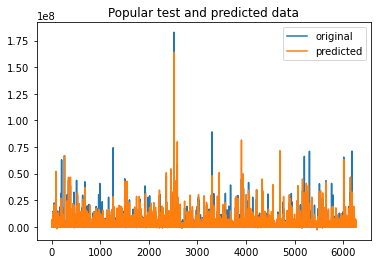




RIDGE
19 skb
MSE:  -5629935097206.693
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982371.1210560442


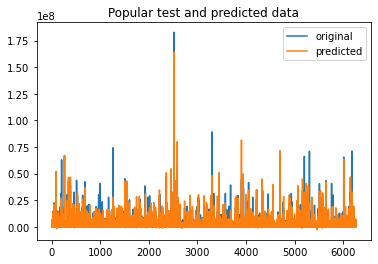




RIDGE
22 skb
MSE:  -5624170979072.641
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982027.3979613974


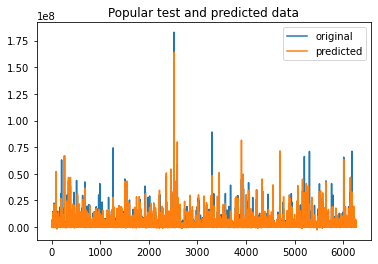




RIDGE
25 skb
MSE:  -5615725912107.354
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1981109.589914251


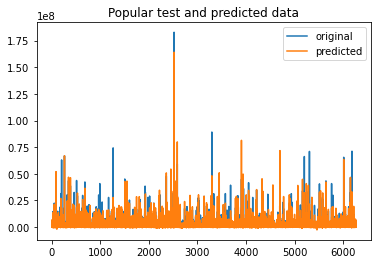




RIDGE
27 skb
MSE:  -5612949208568.557
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980486.7006912548


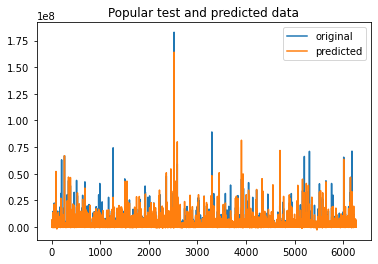




RIDGE
30 skb
MSE:  -5613124092986.259
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980964.3909418678


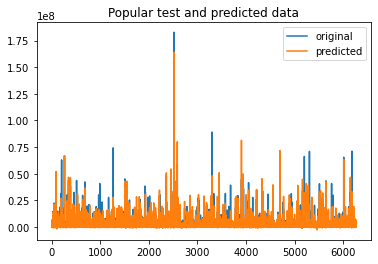




EN
1 rfe
MSE:  -27694881300160.344
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2042735.0597375557


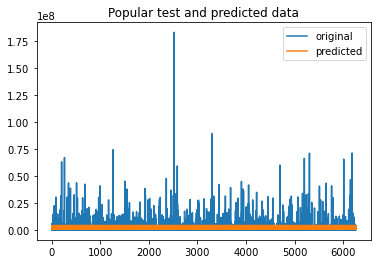




EN
5 rfe
MSE:  -27515971292216.527
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2034485.0606844001


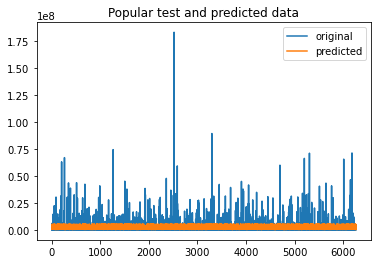




EN
9 rfe
MSE:  -27531019381721.965
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2036129.0158382738


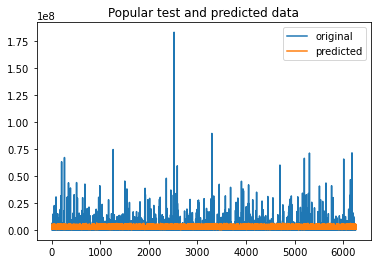




EN
13 rfe
MSE:  -27505462903537.56
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2037724.5002343538


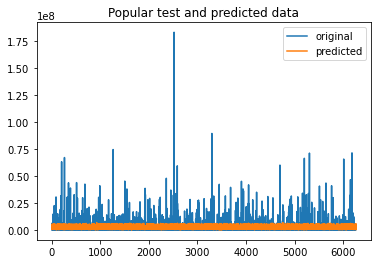




EN
17 rfe
MSE:  -27507327107746.562
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2037898.778684198


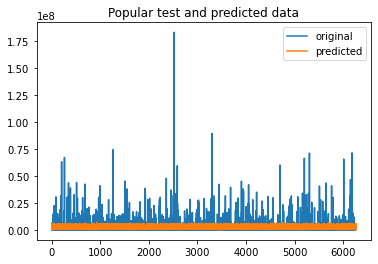




EN
19 rfe
MSE:  -27514948748321.51
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2038143.2187205413


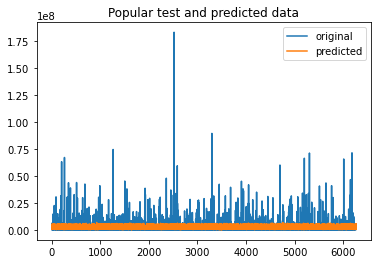




EN
22 rfe
MSE:  -22705889048713.5
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2021903.1494555792


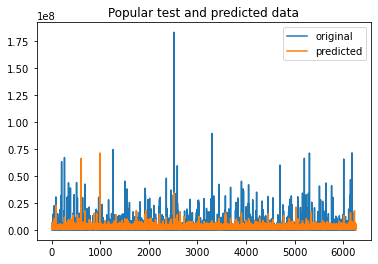




EN
25 rfe
MSE:  -7941670037692.791
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1984586.429997827


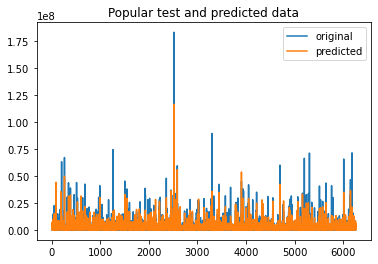




EN
27 rfe
MSE:  -7938470848182.522
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1983416.9618952593


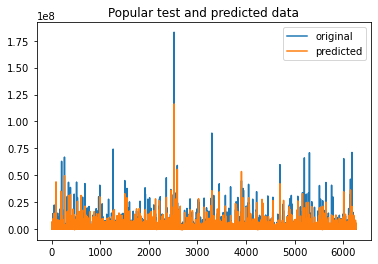




EN
30 rfe
MSE:  -7837780675091.498
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980355.4959512916


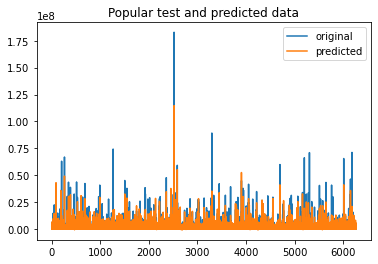




EN
1 skb
MSE:  -8345693691526.883
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2004351.6196850871


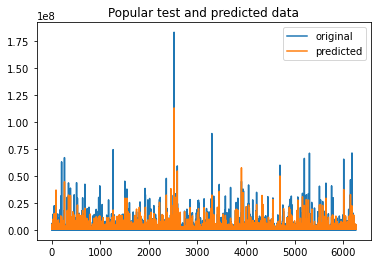




EN
5 skb
MSE:  -7818725510694.292
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1981994.7471643891


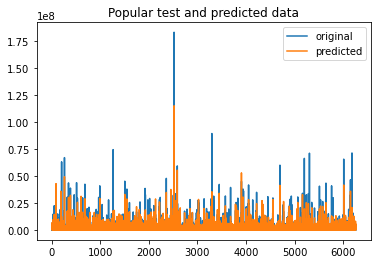




EN
9 skb
MSE:  -7855613325894.126
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980828.4945809848


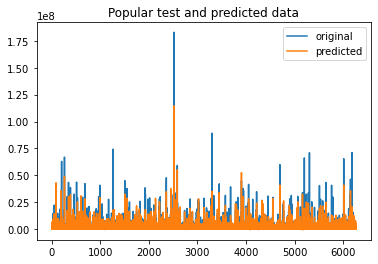




EN
13 skb
MSE:  -7854387142133.551
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1982030.8455730875


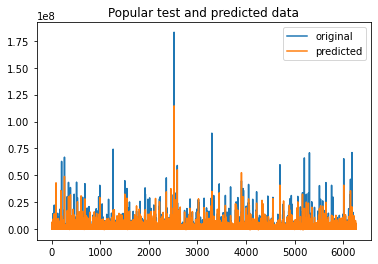




EN
17 skb
MSE:  -7854074955280.853
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980465.1298389249


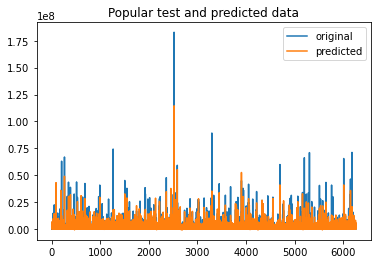




EN
19 skb
MSE:  -7856126165041.439
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980686.6864169547


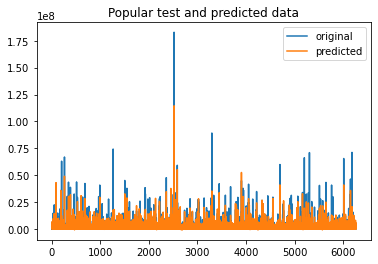




EN
22 skb
MSE:  -7843797309009.001
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980453.7758779228


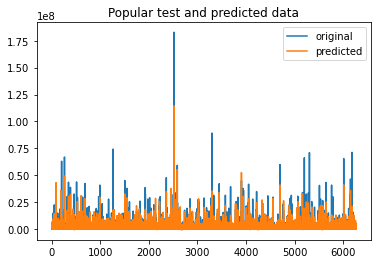




EN
25 skb
MSE:  -7838290442088.465
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1979955.8299043153


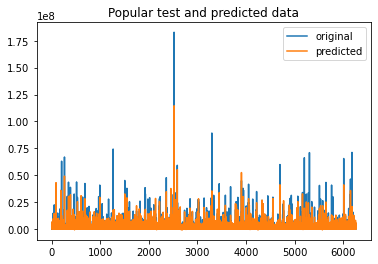




EN
27 skb
MSE:  -7838158649555.732
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1979703.4907057253


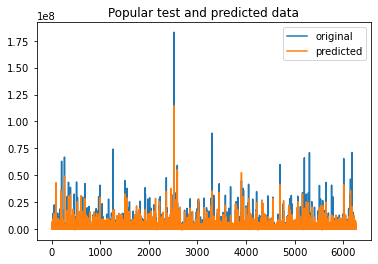




EN
30 skb
MSE:  -7838353031394.579
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980426.4721138661


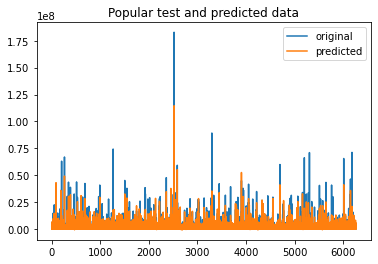




KNN
1 rfe
MSE:  -27422913063097.707
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1639917.3544352269


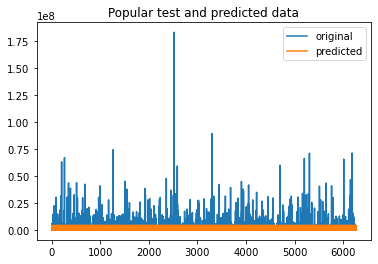




KNN
5 rfe
MSE:  -47496551643154.65
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 3066754.603956605


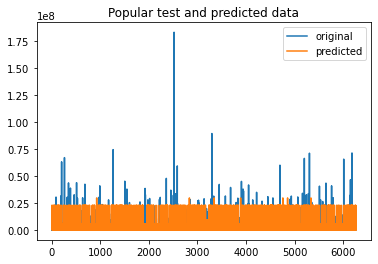




KNN
9 rfe
MSE:  -30097131149896.812
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1845709.6896617743


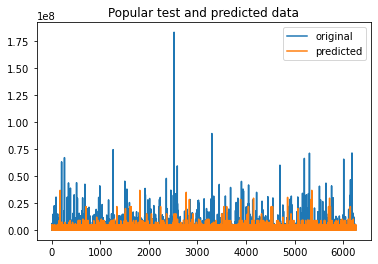




KNN
13 rfe
MSE:  -32882973165145.11
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2031200.9029674537


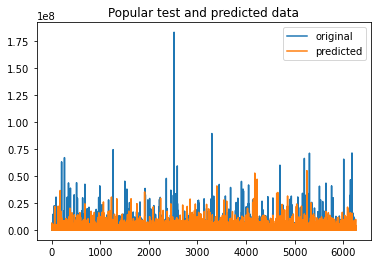




KNN
17 rfe
MSE:  -32879627831150.45
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2047096.5738991706


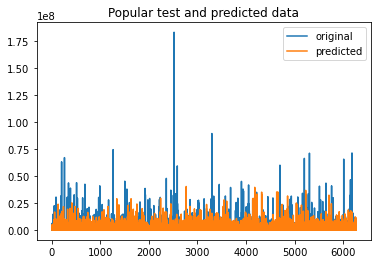




KNN
19 rfe
MSE:  -32413509726161.52
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2040664.255520102


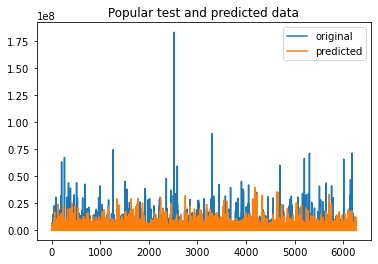




KNN
22 rfe
MSE:  -22816694796621.7
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1805166.6626675176


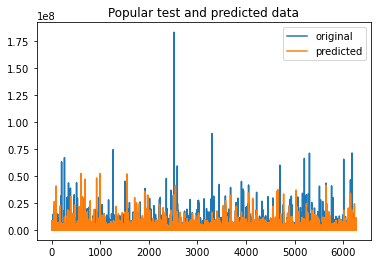




KNN
25 rfe
MSE:  -9840569503390.414
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1717950.0145820042


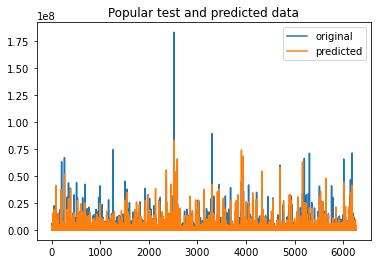




KNN
27 rfe
MSE:  -10063731920348.48
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1732418.8532227185


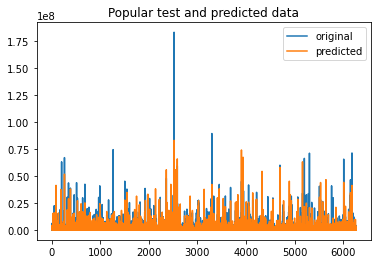




KNN
30 rfe
MSE:  -9486537495896.186
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1698943.3240906193


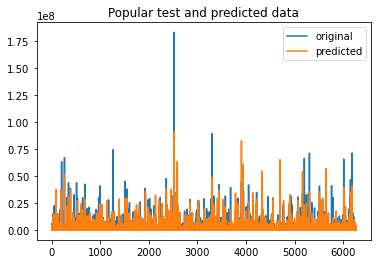




KNN
1 skb
MSE:  -8159746883676.345
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1943477.3200063815


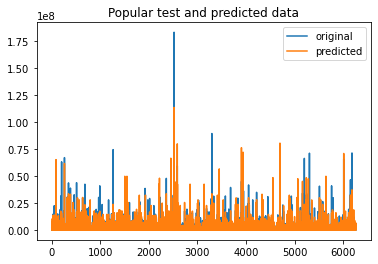




KNN
5 skb
MSE:  -7874667439913.75
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1922242.2763880028


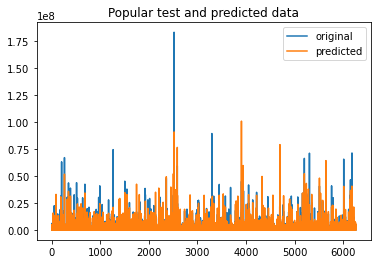




KNN
9 skb
MSE:  -7013890247863.701
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1881968.7175813655


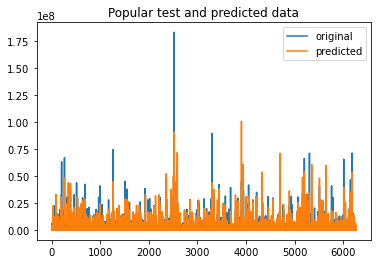




KNN
13 skb
MSE:  -7721628566933.294
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1807232.6572750479


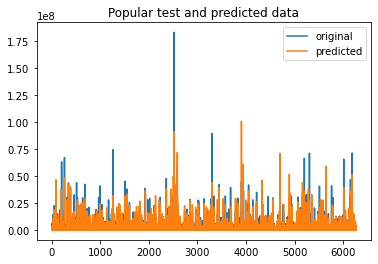




KNN
17 skb
MSE:  -7307585269048.1455
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1796993.9684428845


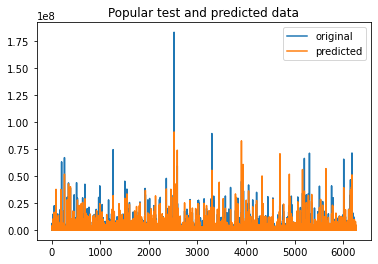




KNN
19 skb
MSE:  -7624948725273.209
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1790778.8150287173


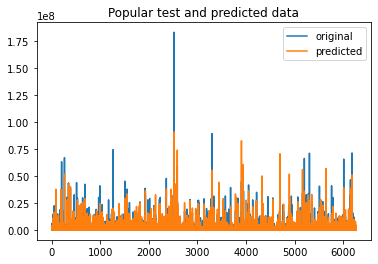




KNN
22 skb
MSE:  -8316468650544.995
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1783806.7153158903


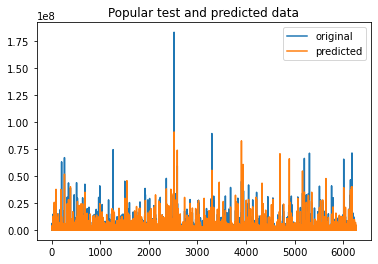




KNN
25 skb
MSE:  -8163884060008.059
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1750411.957657945


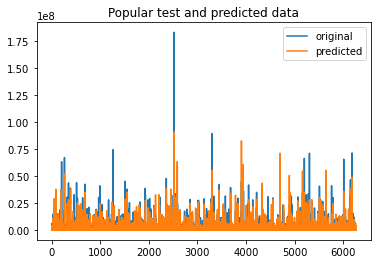




KNN
27 skb
MSE:  -8201391212620.577
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1740238.112890874


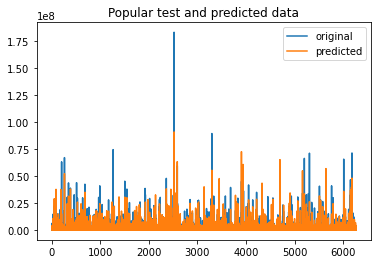




KNN
30 skb
MSE:  -9406154648359.125
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1708392.1761965542


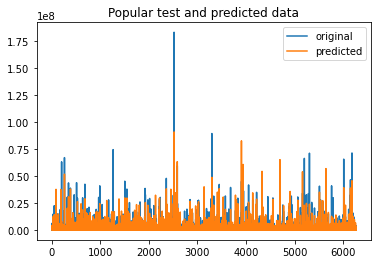




SGD
1 rfe
MSE:  -32393589110934.254
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1960575.8290718477


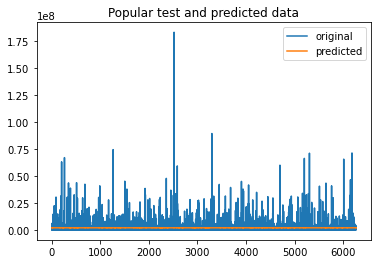




SGD
5 rfe
MSE:  -29415688812917.99
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1941658.3722859381


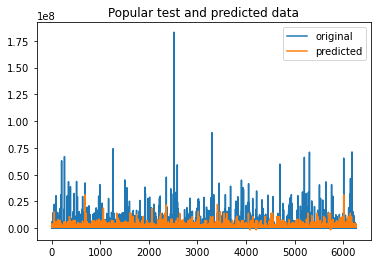




SGD
9 rfe
MSE:  -6257523774111.377
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1939472.20029418


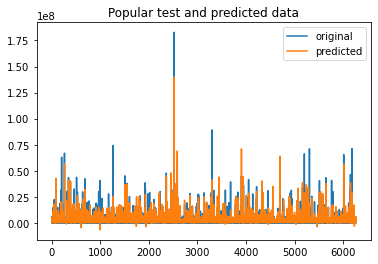




SGD
13 rfe
MSE:  -5797380872514.811
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1932439.5634776796


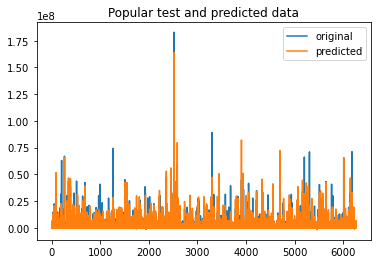




SGD
17 rfe
MSE:  -6099175150552.278
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1989044.5414865992


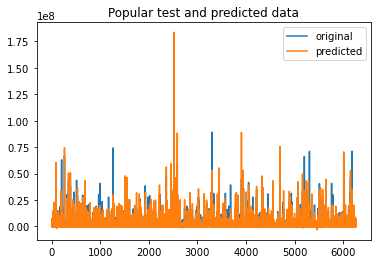




SGD
19 rfe
MSE:  -7151607566082.344
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2010066.7796548426


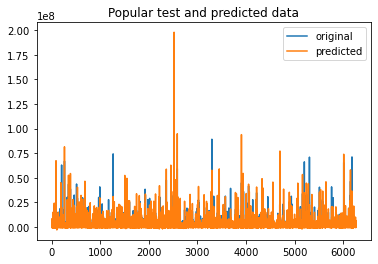




SGD
22 rfe
MSE:  -5804616778339.456
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1987109.7650412533


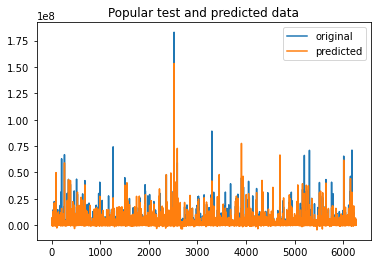




SGD
25 rfe
MSE:  -6133720611919.483
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1983468.0870648313


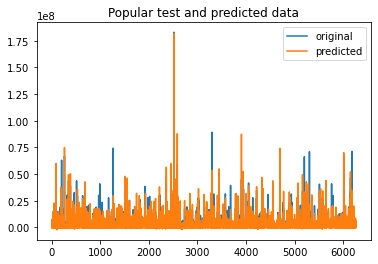




SGD
27 rfe
MSE:  -5582531318172.486
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1980029.1852038


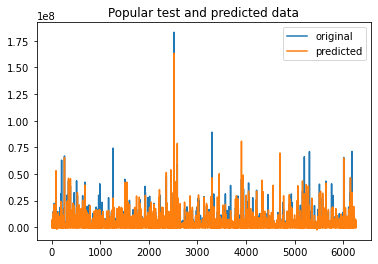




SGD
30 rfe
MSE:  -5562970501087.179
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1961172.4144621203


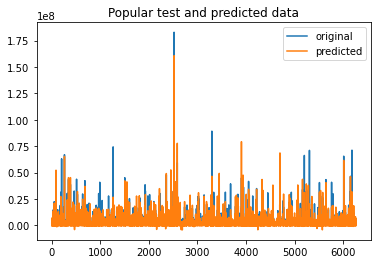




SGD
1 skb
MSE:  -5904314500296.117
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1923587.0678254573


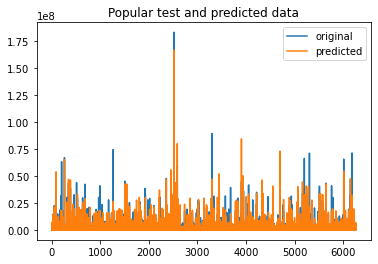




SGD
5 skb
MSE:  -6091662426475.612
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1995319.1221771839


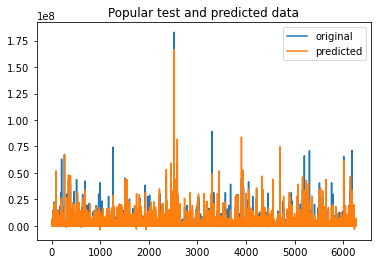




SGD
9 skb
MSE:  -5819476869727.616
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1933227.7330189259


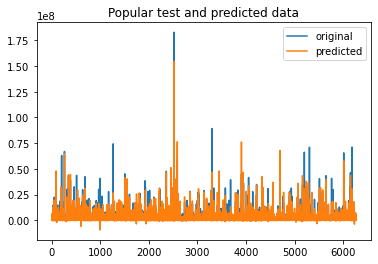




SGD
13 skb
MSE:  -6071259092983.705
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2011365.6650550268


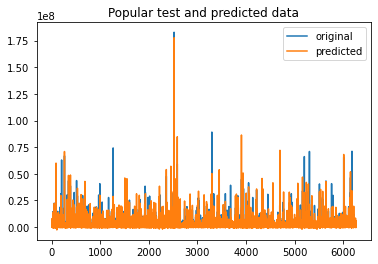




SGD
17 skb
MSE:  -5723903520914.423
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1931189.666692885


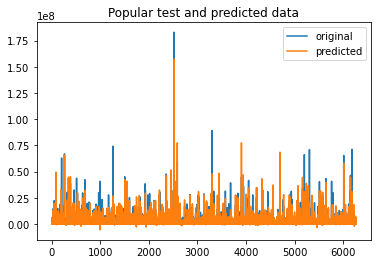




SGD
19 skb
MSE:  -5817206254574.533
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1997319.7630843609


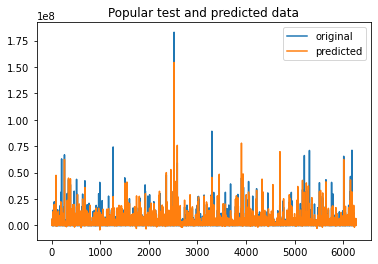




SGD
22 skb
MSE:  -6356286828387.859
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2037588.6151417524


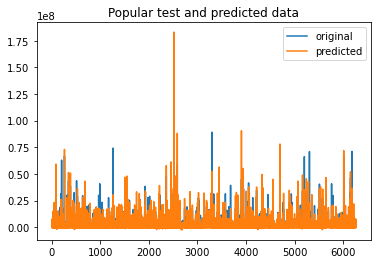




SGD
25 skb
MSE:  -5789698400105.36
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1998425.4084241686


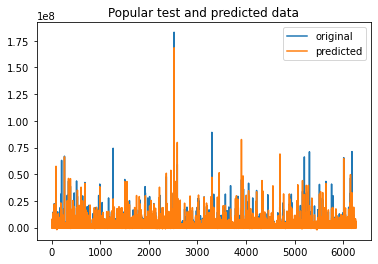




SGD
27 skb
MSE:  -6008834946372.402
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1992228.883751281


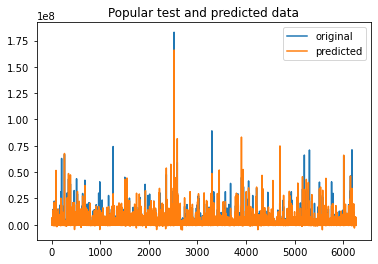




SGD
30 skb
MSE:  -5620897827433.355
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1954119.9978390802


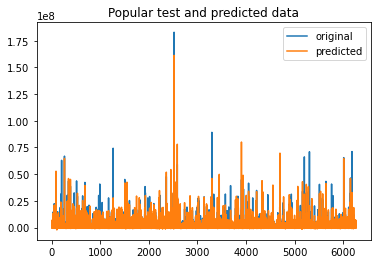




DTR
1 rfe
MSE:  -8914208593897.77
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1966327.6882791764


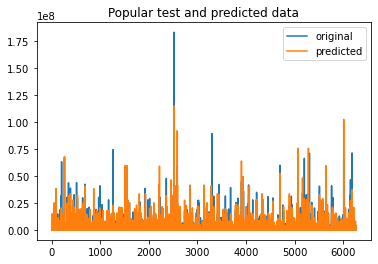




DTR
5 rfe
MSE:  -18652872012989.7
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2128132.391831525


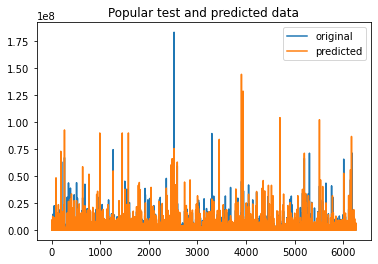




DTR
9 rfe
MSE:  -11696454912377.797
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2010396.6086470964


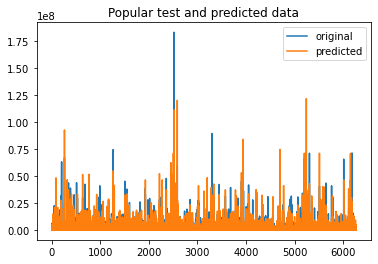




DTR
13 rfe
MSE:  -14626817774208.115
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2076370.5119655393


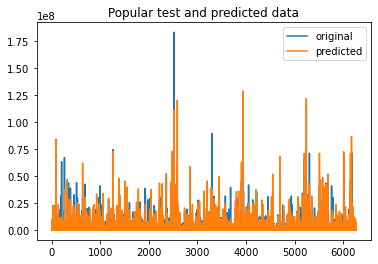




DTR
17 rfe
MSE:  -16192711698381.738
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2037433.1992661136


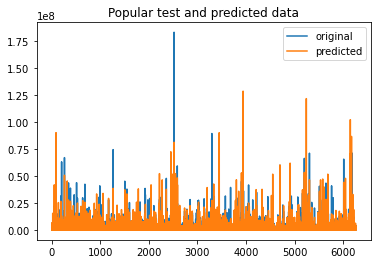




DTR
19 rfe
MSE:  -14881077833176.682
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2035388.1944798979


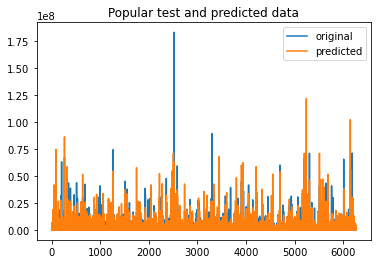




DTR
22 rfe
MSE:  -14766171055131.676
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2031972.6769304404


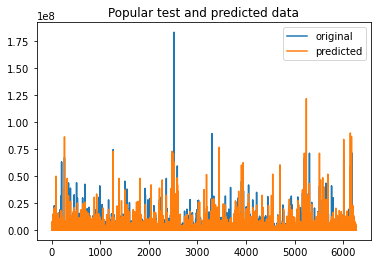




DTR
25 rfe
MSE:  -17320378522247.59
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2081523.4988832164


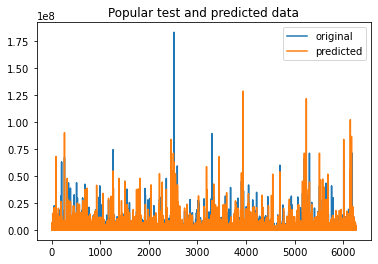




DTR
27 rfe
MSE:  -15608840383948.781
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2077560.8340778558


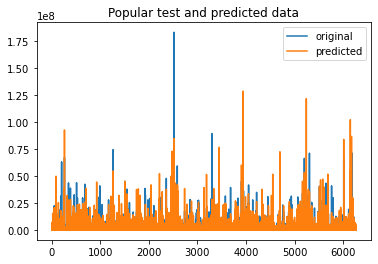




DTR
30 rfe
MSE:  -14523035037013.71
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2057682.8345564774


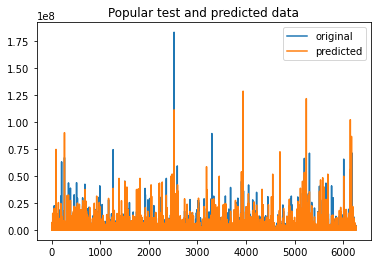




DTR
1 skb
MSE:  -8914208593897.77
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1966327.6882791764


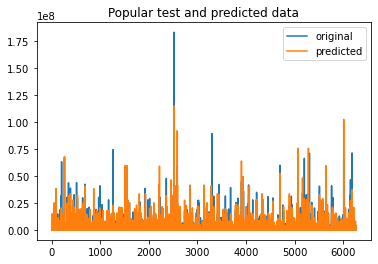




DTR
5 skb
MSE:  -13052337826275.46
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2012212.9284513933


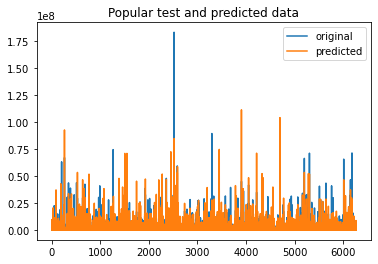




DTR
9 skb
MSE:  -12418000559847.717
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1988919.791799617


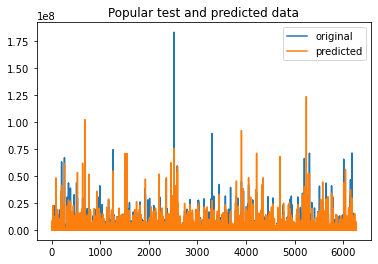




DTR
13 skb
MSE:  -13886546644023.244
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1975776.5266432674


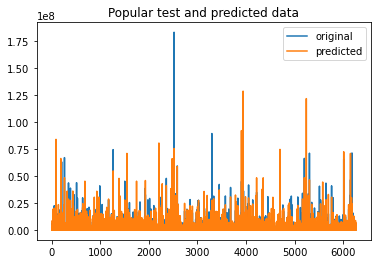




DTR
17 skb
MSE:  -10992163984852.633
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1962408.4952137843


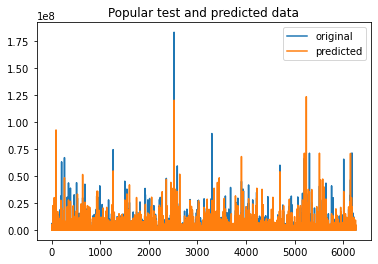




DTR
19 skb
MSE:  -13337526851837.79
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 1964343.2932354817


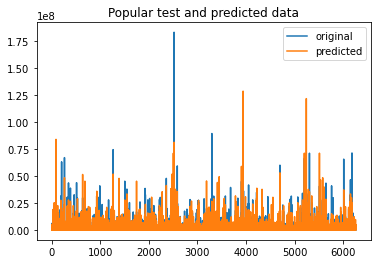




DTR
22 skb
MSE:  -12306612306974.645
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2011268.0464262923


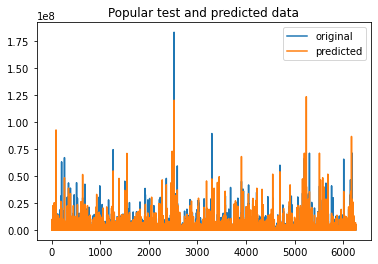




DTR
25 skb
MSE:  -14831726516376.602
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2084236.332641991


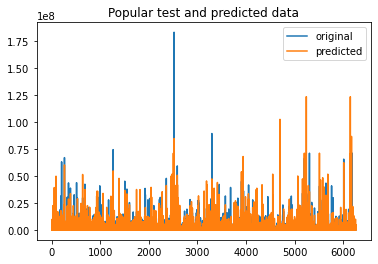




DTR
27 skb
MSE:  -14077495645923.926
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2030628.7147415443


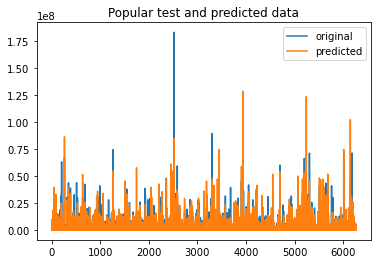




DTR
30 skb
MSE:  -16224444749401.17
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2050562.3836949584


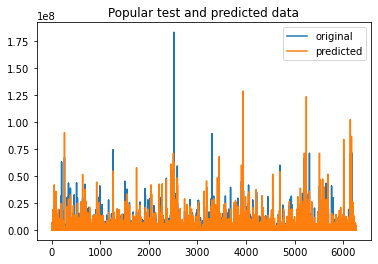

In [59]:
# ---------- All Model TESTING ----------
d = {'model': 'Dummy','Mean CV Acc':[0] ,'Test Acc': [0],'best_params':[0],'rfe':[0]}
results_svr_df = pd.DataFrame(data=d)

# model_list = [LinearRegression(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor(),ElasticNet(),LinearSVR()]
model_list = [LinearRegression(),Lasso(),Ridge(),ElasticNet(),ElasticNet(),SGDRegressor(),DecisionTreeRegressor()]
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('LASSO', Pipeline([('Scaler', StandardScaler()),('m', Lasso())])))
pipelines.append(('RIDGE', Pipeline([('Scaler', StandardScaler()),('m', Ridge())])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('m', ElasticNet())])))
# pipelines.append(('ABR', Pipeline([('Scaler', StandardScaler()),('m', AdaBoostRegressor())])))
# pipelines.append(('MLP', Pipeline([('Scaler', StandardScaler()),('m', MLPRegressor())])))
# pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('m', LinearSVR())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('m', KNeighborsRegressor())])))
pipelines.append(('SGD', Pipeline([('Scaler', StandardScaler()),('m', SGDRegressor())])))
pipelines.append(('DTR', Pipeline([('Scaler', StandardScaler()),('m', DecisionTreeRegressor())])))

rfe_list = [1,5,9,13,17,19,22,25,27,30,1,5,9,13,17,19,22,25,27,30]
# rfe_list = [1,3,1,3]
# for dataset in data_list_old_v2:
j=0
for name, model in pipelines:
    count=0
    for num in rfe_list:
        if num==1:
            count = count+1
        clean_df = data.drop(columns=['playCount'])
        clean_df['playCount'] = data['playCount']
#     GET RID OF OUTLIERS
#         mean = dataset[1]['ngr'].mean()
#         std = dataset[1]['ngr'].std()
#         clean_df = dataset[1][dataset[1]['ngr'] < (mean + (4*std))]

# #             square the df
#         df_squared = clean_df.drop(columns=['ngr'])
#         signs = np.sign(df_squared)
#         df_squared = df_squared.abs()
#         df_squared = df_squared**1.7 * signs
#         df_squared['ngr'] = clean_df['ngr']
#         clean_df = df_squared

#         do RFE
        if count<=1:
            num_feature = clean_df.shape[1]
            X = clean_df.iloc[:,0:num_feature-1]
            y = clean_df.iloc[:,num_feature-1:num_feature].values.ravel()
            rfe = RFE(model_list[j], num)
            fit = rfe.fit(X, y)
            good_columns = pd.DataFrame(X.columns)
            good_columns = good_columns.loc[fit.support_,:]
            best_columns = good_columns[0].to_list()
            smaller_df = clean_df[best_columns]
            smaller_df['playCount'] = clean_df['playCount']
            type_feat_select='rfe'
#         do select k best
        if count>1:
            num_feature = clean_df.shape[1]
            X = clean_df.iloc[:,0:num_feature-1]
            y = clean_df.iloc[:,num_feature-1:num_feature].values.ravel()
            selector = SelectKBest(f_regression, k=num)
            selector.fit(X, y)
            best_columns = selector.get_support(indices=True)
            best_columns = list(clean_df.columns[best_columns])
            smaller_df = clean_df[best_columns]
            smaller_df['playCount'] = clean_df['playCount']
            type_feat_select='skb'

        num_feature = smaller_df.shape[1]
        X_train, X_test, y_train, y_test = train_test_split(smaller_df.iloc[:,0:num_feature-1], smaller_df.iloc[:,num_feature-1:num_feature].values.ravel(), test_size=0.20, random_state=42)
        

#         if name == 'LR':
#             grid_params_svr = [{}]
#         elif name == 'LASSO' or name == 'EN' or name == 'RIDGE':
#             grid_params_svr = [{'m__alpha': [.1,.5,1]}]
#         elif name == 'ABR':
#             grid_params_svr = [{'m__n_estimators': [40,50,70]}]
#         elif name == 'MLP':
#             grid_params_svr = [{'m__alpha': [.0001,.0005]}]
#         elif name == 'SVR':
#             grid_params_svr = [{'m__C': [.5,1,2], 'm__epsilon': [.01,.1,.5]}]
#         elif name == 'KNN':
#             grid_params_svr = [{'m__n_neighbors': [3,5,7]}]
#         elif name == 'SGD':
#             grid_params_svr = [{'m__alpha': [.0001,.0005]}]
#         elif name == 'DTR':
#             grid_params_svr = [{'m__min_samples_split': [2,3,4]}]
        grid_params_svr = [{}]

        grid_SVR = GridSearchCV(estimator=model, param_grid=grid_params_svr, cv=3,scoring='neg_mean_squared_error')
        grid_SVR.fit(X_train, y_train)
        ypred = grid_SVR.predict(X_test)
        r2 = r2_score(y_test, ypred)
        mse = grid_SVR.score(X_test,y_test)

        d = {'model': name,'Mean CV Acc':[grid_SVR.best_score_], 'Test Acc': [mse], 'best_params':[grid_SVR.best_params_],'rfe':[num],'r2':[r2],'best_features':[best_columns],'type_feat_select':type_feat_select}
        results_svr_df = results_svr_df.append(pd.DataFrame(data=d))
        
        print(name)
        print(num,type_feat_select)
        print("MSE: ", mse)
        print("Y length:",len(y_test))
        print("Y test mean:",y_test.mean())
        print("Y pred mean:",ypred.mean())
        x_ax = range(len(y_test))
        plt.plot(x_ax, y_test, label="original")
        plt.plot(x_ax, ypred, label="predicted")
        plt.title("Popular test and predicted data")
        plt.legend()
        plt.show()
        print('\n\n')

    j=j+1

<AxesSubplot:xlabel='rfe', ylabel='r2'>

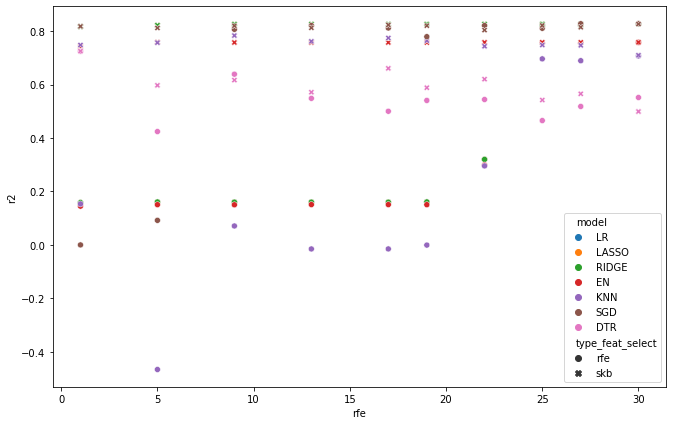

In [60]:
results_svr_df = results_svr_df[results_svr_df['model']!='Dummy']
plt.figure(figsize=(11, 7))
sns.scatterplot(data=results_svr_df, x=results_svr_df['rfe'], y=results_svr_df['r2']
                ,hue=results_svr_df['model'],style=results_svr_df['type_feat_select'],estimator=None, palette=sns.color_palette('tab10', n_colors=7))


Text(0.5, 1.0, 'Model Results')

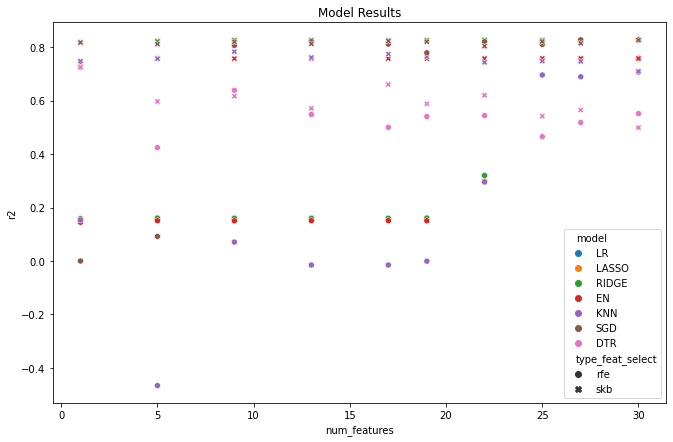

In [97]:
results_svr_df = results_svr_df[results_svr_df['model']!='Dummy']
plt.figure(figsize=(11, 7))
sns.scatterplot(data=results_svr_df, x=results_svr_df['rfe'], y=results_svr_df['r2']
                ,hue=results_svr_df['model'],style=results_svr_df['type_feat_select'],estimator=None, palette=sns.color_palette('tab10', n_colors=7))
plt.xlabel("num_features")
plt.ylabel("r2")
plt.title("Model Results")

In [72]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
results_svr_df.drop(columns=['best_params'])
# results_svr_df[results_svr_df['model']=='LR'].sort_values(by='r2',ascending=False)
dffdf = results_svr_df.sort_values(by='Test Acc',ascending=False).drop(columns=['best_params','CV Acc']).rename(columns={'Test Acc': "Test MSE",'rfe':'num_features'})
dffdf.to_csv(f'all_model_results_supervised.csv')
dffdf.head(15)



,model,Test MSE,num_features,r2,best_features,type_feat_select
0,SGD,-5.562971e+12,30,0.828230,"[id, text, hour, dayofweek, authorMeta.id, aut...",rfe
0,SGD,-5.582531e+12,27,0.827626,"[id, text, hour, dayofweek, authorMeta.id, aut...",rfe
0,RIDGE,-5.612949e+12,27,0.826687,"[id, text, hour, authorMeta.id, authorMeta.ver...",skb
0,RIDGE,-5.613124e+12,30,0.826681,"[id, text, hour, dayofweek, authorMeta.id, aut...",skb
0,LASSO,-5.613169e+12,27,0.826680,"[id, text, hour, authorMeta.id, authorMeta.ver...",skb
0,LR,-5.613171e+12,27,0.826680,"[id, text, hour, authorMeta.id, authorMeta.ver...",skb
0,LASSO,-5.613344e+12,30,0.826675,"[id, text, hour, dayofweek, authorMeta.id, aut...",skb
0,LR,-5.613346e+12,30,0.826675,"[id, text, hour, dayofweek, authorMeta.id, aut...",skb
0,LR,-5.615175e+12,30,0.826618,"[text, hour, dayofweek, authorMeta.id, authorM...",rfe
0,RIDGE,-5.615726e+12,25,0.826601,"[id, text, hour, authorMeta.verified, authorMe...",skb


0.7670769304707881
-8762717371353.644 

0.8208875619181014
-5800764970772.907 

mean cv -8780122776991.98
{'m__alpha': 0.0002, 'm__epsilon': 0.11, 'm__max_iter': 900, 'm__tol': 0.0009}
MSE:  -5732248309030.673
Y length: 6268
Y test mean: 1943331.5663688576
Y pred mean: 2019408.094744561


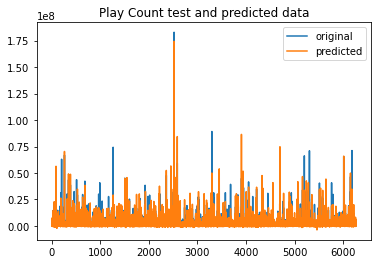

In [125]:
pd.set_option("display.max_rows", False, "display.max_columns", False)

df1 = data.drop(columns=['playCount'])
df1['playCount'] = data['playCount']
clean_df = df1

pipelines = []
pipelines.append(('SGD', Pipeline([('Scaler', StandardScaler()),('m', SGDRegressor())])))

#     do rfe
# for name, model in pipelines:

num_feature = clean_df.shape[1]
X = clean_df.iloc[:,0:num_feature-1]
y = clean_df.iloc[:,num_feature-1:num_feature].values.ravel()
rfe = RFE(SGDRegressor(), 30)
fit = rfe.fit(X, y)
good_columns = pd.DataFrame(X.columns)
good_columns = good_columns.loc[fit.support_,:]
best_columns = good_columns[0].to_list()
smaller_df = clean_df[best_columns]
smaller_df['playCount'] = clean_df['playCount']
type_feat_select='rfe'

num_feature = smaller_df.shape[1]
X_train, X_test, y_train, y_test = train_test_split(smaller_df.iloc[:,0:num_feature-1], smaller_df.iloc[:,num_feature-1:num_feature].values.ravel(), test_size=0.20, random_state=42)

grid_params = [{'m__alpha': [.0001,.0002],'m__max_iter':[900,1000,1100]
                    ,'m__epsilon':[.09,.1,.11],'m__tol':[.0009,.001,.002]}]

grid_SVR = GridSearchCV(estimator=pipelines[0][1], param_grid=grid_params, cv=3,scoring='neg_mean_squared_error')
grid_SVR.fit(X_train, y_train)
ypred_test = grid_SVR.predict(X_test)
r2_test = r2_score(y_test, ypred_test)

ypred_train = grid_SVR.predict(X_train)
r2_train = r2_score(y_train, ypred_train)

mse_test = grid_SVR.score(X_test,y_test)
mse_train = grid_SVR.score(X_train,y_train)


print(r2_train)
print(mse_train,'\n')
print(r2_test)
print(mse_test,'\n')
print('mean cv',grid_SVR.best_score_)
print(grid_SVR.best_params_)


ypred = grid_SVR.predict(X_test)
print("MSE: ", mse)
print("Y length:",len(y_test))
print("Y test mean:",y_test.mean())
print("Y pred mean:",ypred.mean())
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Play Count test and predicted data")
plt.legend()
plt.show()




In [112]:
pd.set_option("display.max_rows", False, "display.max_columns", False)

df1 = data.drop(columns=['playCount'])
df1['playCount'] = data['playCount']

length = df1.shape[0]
inc = int(length / 20)
curr = inc

d = {'Type':'' ,'Score':[], 'num_samples':[]}
results_df = pd.DataFrame(data=d)

pipelines = []
pipelines.append(('SGD', Pipeline([('Scaler', StandardScaler()),('m', SGDRegressor())])))
i=0
while curr<length:
    print(i)
    clean_df = pd.DataFrame(df1.iloc[:curr,:])
#     clean_df = df1
#     do rfe
    num_feature = clean_df.shape[1]
    X = clean_df.iloc[:,0:num_feature-1]
    y = clean_df.iloc[:,num_feature-1:num_feature].values.ravel()
    rfe = RFE(SGDRegressor(), 30)
    fit = rfe.fit(X, y)
    good_columns = pd.DataFrame(X.columns)
    good_columns = good_columns.loc[fit.support_,:]
    best_columns = good_columns[0].to_list()
    smaller_df = clean_df[best_columns]
    smaller_df['playCount'] = clean_df['playCount']
    type_feat_select='rfe'
        
    num_feature = smaller_df.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(smaller_df.iloc[:,0:num_feature-1], smaller_df.iloc[:,num_feature-1:num_feature].values.ravel(), test_size=0.20, random_state=42)
    
    grid_params = [{'m__alpha': [.0001,.0005]}]
    
    grid_SVR = GridSearchCV(estimator=pipelines[0][1], param_grid=grid_params, cv=3,scoring='neg_mean_squared_error')
    grid_SVR.fit(X_train, y_train)
    ypred = grid_SVR.predict(X_test)
    r2 = r2_score(y_test, ypred)
    mse = grid_SVR.score(X_test,y_test)
    
    d = {'Type':'Train' ,'Score':[grid_SVR.score(X_train,y_train)], 'num_samples':[curr]}
    results_df = results_df.append(pd.DataFrame(data=d))
    
    d = {'Type':'Test' ,'Score':[grid_SVR.score(X_test,y_test)], 'num_samples':[curr]}
    results_df = results_df.append(pd.DataFrame(data=d))
    
    
    curr = curr+inc
    i=i+1



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


<AxesSubplot:xlabel='num_samples', ylabel='Score'>

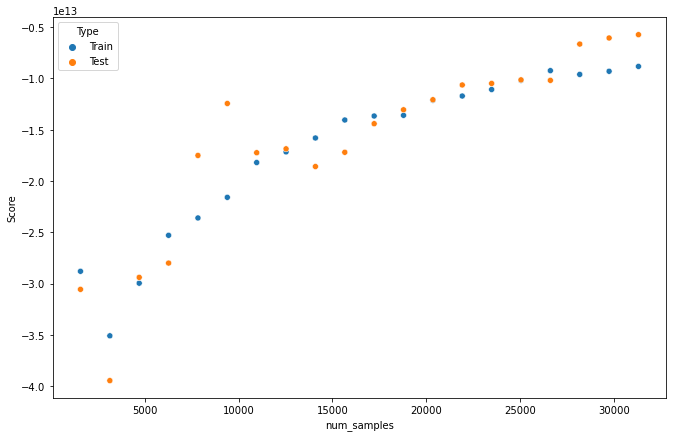

In [116]:
# results_svr_df = results_df[results_df['model']!='Dummy']
plt.figure(figsize=(11, 7))
sns.scatterplot(data=results_df, x=results_df['num_samples'], y=results_df['Score']
                ,hue=results_df['Type'],estimator=None, palette=sns.color_palette('tab10', n_colors=2))
# plt.xlabel("num_features")
# plt.ylabel("r2")
# plt.title("Model Results")